In [1]:
import os
import numpy as np 
import pandas as pd
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
from pathlib import Path
import tensorflow_hub as hub    
#import cv2
import tensorflow as tf
from tensorflow import keras
import glob
import matplotlib.image as mpimg
%matplotlib inline

glob, matplotlib, pathlib, pandas, xml.etree.ElementTree

In [2]:
print(tf.__version__)

2.10.1


In [3]:
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
im_dir = 'C:/Users/dell g3/PolypsSet/test2019/Image/1'
annot_dir = 'C:/Users/dell g3/PolypsSet/test2019/Annotation/1'


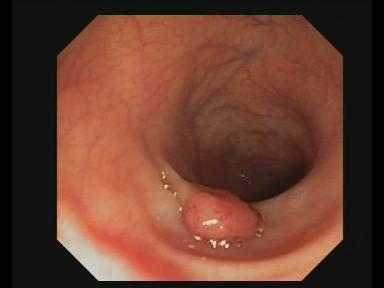

In [5]:
sample_img = Image.open('C:/Users/dell g3/PolypsSet/test2019/Image/1/1.jpg')
sample_img

In [6]:
with open('C:/Users/dell g3/PolypsSet/test2019/Annotation/1/1.xml') as annot_file:
    print(''.join(annot_file.readlines()))

<annotation>
    <folder>15</folder>
    <filename>1.png</filename>
    <path>/scratch/mfathan/Thesis/Dataset/Extracted/MICCAI2017_Test/test/15/1.png</path>
    <source>
        <database>Unknown</database>
    </source>
    <size>
        <width>384</width>
        <height>288</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>adenomatous</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>177</xmin>
            <ymin> 181</ymin>
            <xmax> 262</xmax>
            <ymax> 241</ymax>
        </bndbox>
    </object>
</annotation>



# Exploring the annotation xml files

In [7]:
tree = ET.parse('C:/Users/dell g3/PolypsSet/test2019/Annotation/1/1.xml')
root = tree.getroot()

sample_annotations = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)
    
#     print(xmin, ymin, xmax, ymax)
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
print(sample_annotations)

[[177, 181, 262, 241]]


[177, 181, 262, 241]


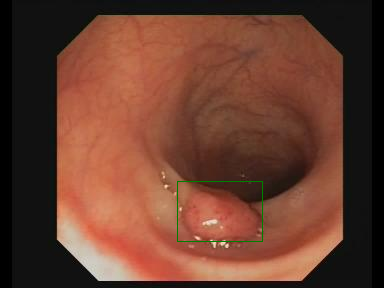

In [8]:
sample_image_annotated = sample_img.copy()

img_bbox = ImageDraw.Draw(sample_image_annotated)

for bbox in sample_annotations:
    print(bbox)
    img_bbox.rectangle(bbox, outline="green") 
    
sample_image_annotated

In [9]:
train = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation')
len(train)

27048

In [10]:
train_adeno = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/Data_Splitted/adenomatous')
train_hyper = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/Data_Splitted/hyperplastic')

print(len(train_adeno), len(train_hyper), (len(train_adeno)+len(train_hyper)))

14269 12779 27048


In [22]:
adeno_train = []
for i in  train_adeno:
    adeno_train.append(i.split('.')[0])

In [38]:
hyper_train = []
for i in  train_hyper:
    hyper_train.append(i.split('.')[0])

In [41]:
file_hyper = []
loc = 'C:/Users/dell g3/Downloads/PolypsSet/train2019/AdenoAnnotation/'
for i in hyper_train:
    file_hyper.append('{}.xml'.format(i))

In [42]:
# for i in file_hyper:
#     path = os.path.join(loc, i)
    
#     os.remove(path)

In [36]:
file_adeno = []
loc = 'C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation/'
for i in adeno_train:
    file_adeno.append('{}.xml'.format(i))

In [37]:
# for i in file_adeno:
#     path = os.path.join(loc, i)
    
#     os.remove(path)

In [44]:
train_adeno_annot = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/AdenoAnnotation')
train_hyper_annot = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/HyperAnnotation')

print(len(train_adeno_annot), len(train_hyper_annot))

14269 12779


In [47]:
for i in adeno_train:
    img = Image.open('C:/Users/dell g3/Downloads/PolypsSet/train2019/Data_Splitted/adenomatous/{}.jpg'.format(i))
    tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/train2019/AdenoAnnotation/{}.xml'.format(i))
    root = tree.getroot()
    
    sample_annotations = []

    for neighbor in root.iter('bndbox'):
        xmin = int(neighbor.find('xmin').text)
        ymin = int(neighbor.find('ymin').text)
        xmax = int(neighbor.find('xmax').text)
        ymax = int(neighbor.find('ymax').text)
        
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
    sample_image_annotated = img.copy()

    img_bbox = ImageDraw.Draw(sample_image_annotated)

    for bbox in sample_annotations:
        img_bbox.rectangle(bbox, outline="green") 
        

    sample_image_annotated = sample_image_annotated.save('C:/Users/dell g3/Downloads/PolypsSet/train2019/adeno_annot_img/{}.jpg'.format(i), 'JPEG')
    

    

In [48]:
for i in hyper_train:
    img = Image.open('C:/Users/dell g3/Downloads/PolypsSet/train2019/Data_Splitted/hyperplastic/{}.jpg'.format(i))
    tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/train2019/HyperAnnotation/{}.xml'.format(i))
    root = tree.getroot()
    
    sample_annotations = []

    for neighbor in root.iter('bndbox'):
        xmin = int(neighbor.find('xmin').text)
        ymin = int(neighbor.find('ymin').text)
        xmax = int(neighbor.find('xmax').text)
        ymax = int(neighbor.find('ymax').text)
        
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
    sample_image_annotated = img.copy()

    img_bbox = ImageDraw.Draw(sample_image_annotated)

    for bbox in sample_annotations:
        img_bbox.rectangle(bbox, outline="green") 
        

    sample_image_annotated = sample_image_annotated.save('C:/Users/dell g3/Downloads/PolypsSet/train2019/hyper_annot_img/{}.jpg'.format(i), 'JPEG')
    


In [475]:
k = os.listdir('C:/Users/dell g3/PolypsSet/test2019/Image/hyper_img/18')
len(k)

35

In [476]:
val = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/hyperAnnot/18')
print(len(val))

38


Validate

In [477]:
k_n = []
val_n = []
pp = []
for i in k:
    k_n.append(i.split('.')[0])
for i in val:
    val_n.append(i.split('.')[0])
for i in val_n:
    if i not in k_n:
        pp.append(i)
print(pp)

['27', '29', '30']


In [478]:
pp_n = []
for i in pp:
    pp_n.append('{}.xml'.format(i))
print(pp_n)


['27.xml', '29.xml', '30.xml']


In [479]:
# locz = 'C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/hyperAnnot/18/'
# for i in pp_n:
#     path = os.path.join(locz, i)
#     os.remove(path)

End Validate

In [480]:
val = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/hyperAnnot/18')
print(len(val))

35


In [481]:
val_adeno = []
empty = []
for i in val:
    tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/hyperAnnot/18/{}'.format(i))
    root = tree.getroot()
    
    for neighbor in root.iter('object'):
        name = neighbor.find('name').text
        if name in ['hyperplastic']:
            val_adeno.append(name)
            empty.append(i)

print(len(val_adeno))
print(len(empty))

35
35


In [469]:
rem = []
for i in val:
    if i not in empty:
        rem.append(i)


In [470]:
f = []
for i in rem:
    f.append('{}.jpg'.format(i.split('.')[0]))
len(f)
    

10

In [471]:
# location = 'C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/hyperAnnot/14/'
# for i in rem:
#     path = os.path.join(location, i)
#     os.remove(path)

In [472]:
# location = 'C:/Users/dell g3/PolypsSet/test2019/Image/hyper_img/14/'
# for i in f:
#     path = os.path.join(location, i)
#     os.remove(path)

In [567]:
valdata = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/test2019/ImageTest/hyperplastic/18')
adeno_val = []
for i in valdata:
    adeno_val.append(i.split('.')[0])


In [568]:
# for i in adeno_val:
#     img = Image.open('C:/Users/dell g3/Downloads/PolypsSet/test2019/ImageTest/hyperplastic/18/{}.jpg'.format(i))
#     tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/hyperAnnot/18/{}.xml'.format(i))
#     root = tree.getroot()
    
#     sample_annotations = []

#     for neighbor in root.iter('bndbox'):
#         xmin = int(neighbor.find('xmin').text)
#         ymin = int(neighbor.find('ymin').text)
#         xmax = int(neighbor.find('xmax').text)
#         ymax = int(neighbor.find('ymax').text)
        
#     sample_annotations.append([xmin, ymin, xmax, ymax])
    
#     sample_image_annotated = img.copy()

#     img_bbox = ImageDraw.Draw(sample_image_annotated)

#     for bbox in sample_annotations:
#         img_bbox.rectangle(bbox, outline="green") 
        

#     sample_image_annotated = sample_image_annotated.save('C:/Users/dell g3/Downloads/PolypsSet/test2019/ImageTest/hyper_annot_img/18/{}.jpg'.format(i), 'JPEG')
    


## Yolo annotations

In [31]:
train_adeno_annot = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation/AdenoAnnotation')
train_hyper_annot = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation/HyperAnnotation')


In [32]:
adeno = []
for i in train_adeno_annot:
    adeno.append(i.split('.')[0])


In [33]:
hyper = []
for i in train_hyper_annot:
    hyper.append(i.split('.')[0])

In [34]:
len(adeno) + len(hyper)

27047

In [35]:
for i in adeno:
    tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation/AdenoAnnotation/{}.xml'.format(i))
    root = tree.getroot()

    for neighbor in root.iter('bndbox'):
        xmin = int(neighbor.find('xmin').text)
        ymin = int(neighbor.find('ymin').text)
        xmax = int(neighbor.find('xmax').text)
        ymax = int(neighbor.find('ymax').text)

    for z in root.iter('size'):
        height = int(z.find('height').text)
        width = int(z.find('width').text)
    bbwidth = xmax - xmin
    bbheight = ymax - ymin

    x_center = ((xmax + xmin)/2) / width
    X_center = round(x_center, 6)
    y_center = ((ymax + ymin)/2) / height
    Y_center = round(y_center, 6)
    W = bbwidth / width
    Wei = round(W, 6)
    H = bbheight / height
    Hei = round(H, 6)

    f = open('C:/Users/dell g3/Downloads/PolypsSet/train2019/Annotation/yolo_AdenoAnnot2/{}.txt'.format(i), 'w')
    f.write('{} {} {} {} {}'.format(1, X_center, Y_center, Wei, Hei))
    f.close()

In [29]:
val = os.listdir('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/adenoAnnot/24')
valid = []
for i in val:
    valid.append(i.split('.')[0])


In [30]:
for i in valid:
    tree = ET.parse('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/adenoAnnot/24/{}.xml'.format(i))
    root = tree.getroot()

    for neighbor in root.iter('bndbox'):
        xmin = int(neighbor.find('xmin').text)
        ymin = int(neighbor.find('ymin').text)
        xmax = int(neighbor.find('xmax').text)
        ymax = int(neighbor.find('ymax').text)

    for z in root.iter('size'):
        height = int(z.find('height').text)
        width = int(z.find('width').text)
    bbwidth = xmax - xmin
    bbheight = ymax - ymin

    x_center = ((xmax + xmin)/2) / width
    X_center = round(x_center, 6)
    y_center = ((ymax + ymin)/2) / height
    Y_center = round(y_center, 6)
    W = bbwidth / width
    Wei = round(W, 6)
    H = bbheight / height
    Hei = round(H, 6)

    f = open('C:/Users/dell g3/Downloads/PolypsSet/test2019/Annotation/yolo_adenoAnnot/24/{}.txt'.format(i), 'w')
    f.write('{} {} {} {} {}'.format(1, X_center, Y_center, Wei, Hei))
    f.close()

### tf records 

In [5]:
os.chdir('C:/Users/dell g3/tmp1/models/workspace/training_demo')

# from xml to csv

In [6]:

import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET



def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        f = xml_file.split("\\")[1].split('.')[0]
        for member in root.findall('object'):
            value = ('{}.jpg'.format(f),
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    path = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/images/'
    image_path = os.path.join(path, 'val_adeno')
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('val_adeno_labels.csv', index=None)
    print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.


# from csv to tfrecords

In [8]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.compat.v1.flags
FLAGS = flags.FLAGS


def class_text_to_int(row_label):
    if row_label == 'adenomatous':
        return 1
    elif row_label == 'hyperplastic':
        return 2
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


def main(_):
    p = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/val_adeno_labels.csv'
    t = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/val_adeno.record'
    i = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/images/'
    writer = tf.io.TFRecordWriter(t)
    path = os.path.join(i, 'val_adeno')
    examples = pd.read_csv(p)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = t
    print('Successfully created the TFRecords: {}'.format(output_path))



main(_)

Successfully created the TFRecords: C:/Users/dell g3/tmp1/models/workspace/training_demo/val_adeno.record


# Training (done in Colab)

In [11]:
os.chdir('C:/Users/dell g3/Downloads/PolypsSet/test2019/ImageTest/Splitted/adenomatous/1')
#  C:/Users/dell g3/tmp1/models/workspace/training_demo/exported-models/my_model

In [6]:
os.getcwd()

'C:\\Users\\dell g3\\tmp1\\models\\workspace\\training_demo'

In [4]:
device = '/gpu:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'

# test code

In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

In [4]:
%load_ext tensorboard

In [28]:
os.chdir('C:/Users/dell g3/tmp1/models/workspace/training_demo/ssd_resnet101_v1_fpn_640x640_/train')

In [30]:
%tensorboard --logdir=./
    

In [33]:
os.chdir('C:/Users/dell g3/tmp1/models/workspace/training_demo')

In [26]:
%tensorboard --logdir logs


In [5]:
import numpy as np
from six import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
%matplotlib inline 

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)


In [8]:


# Load pipeline config and build a detection model
PATH_TO_CFG = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/faster_rcnn_resnet50_v1_640x640_/pipeline.config'
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
PATH_TO_CKPT = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/faster_rcnn_resnet50_v1_640x640_'
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

In [9]:
PATH_TO_LABELS = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for 1.jpg... Done


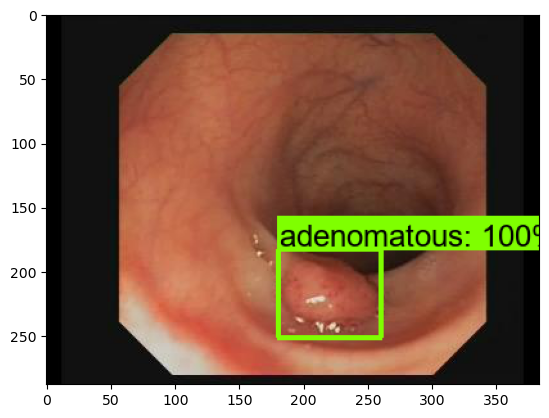

Running inference for 10.jpg... Done


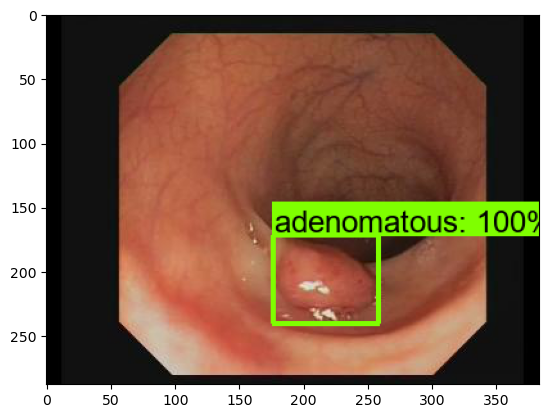

Running inference for 100.jpg... Done


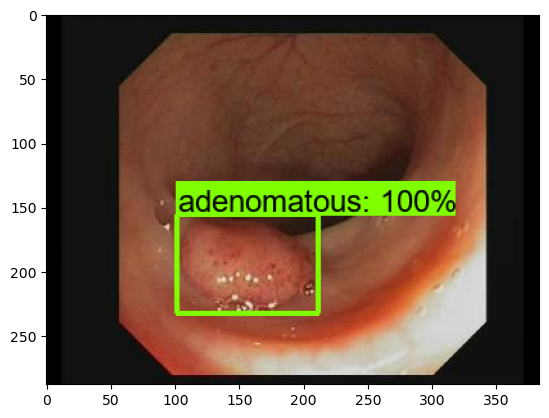

Running inference for 101.jpg... Done


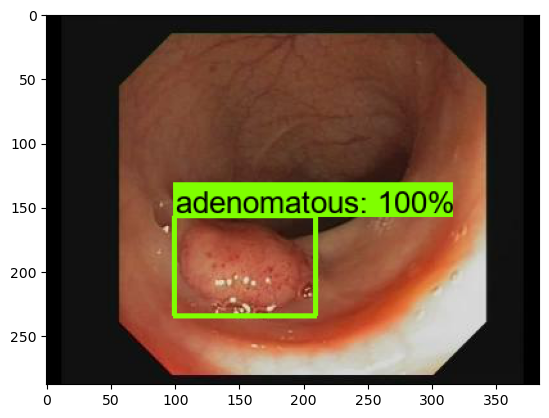

Running inference for 102.jpg... Done


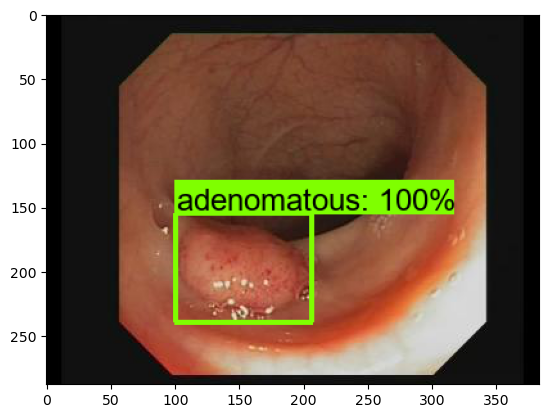

Running inference for 103.jpg... Done


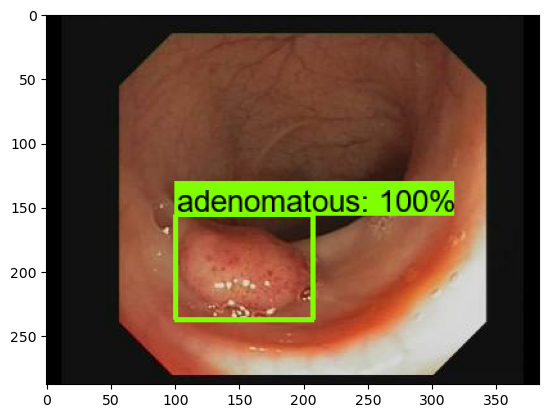

Running inference for 104.jpg... Done


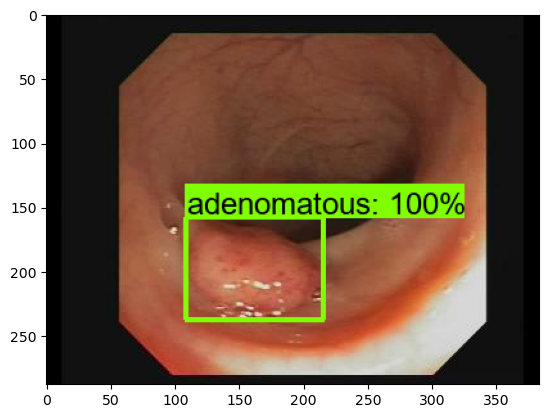

Running inference for 105.jpg... Done


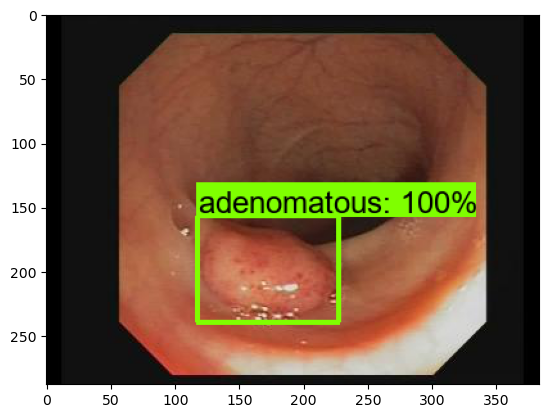

Running inference for 106.jpg... Done


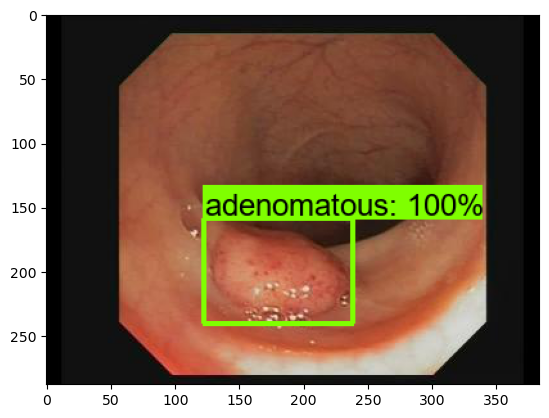

Running inference for 107.jpg... Done


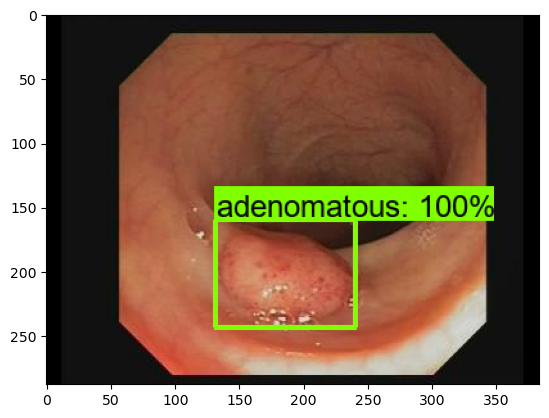

Running inference for 108.jpg... Done


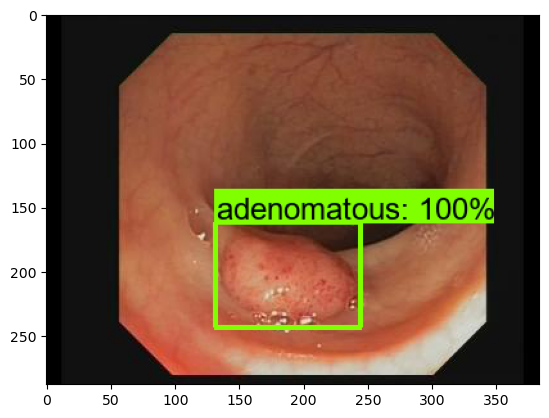

Running inference for 109.jpg... Done


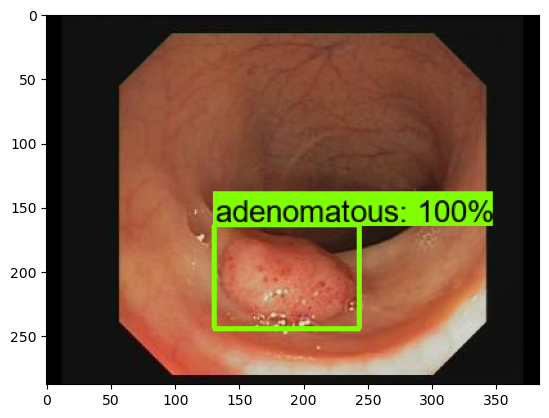

Running inference for 11.jpg... Done


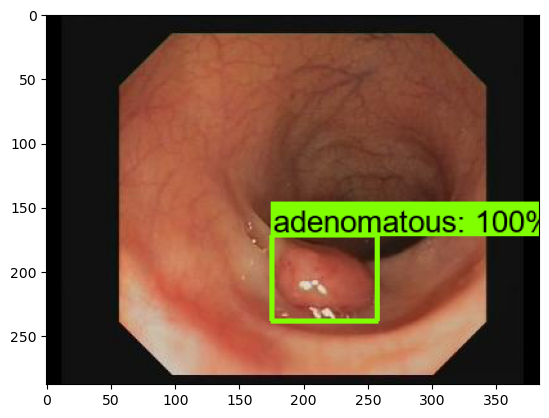

Running inference for 110.jpg... Done


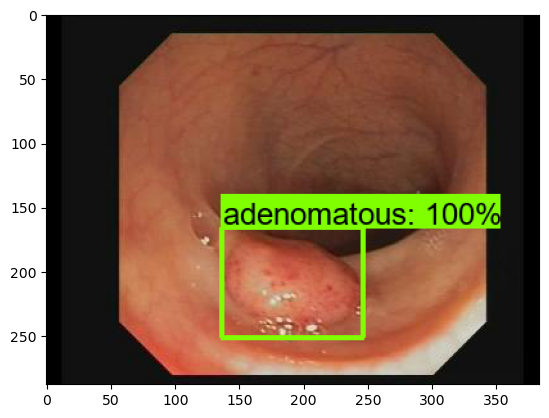

Running inference for 111.jpg... Done


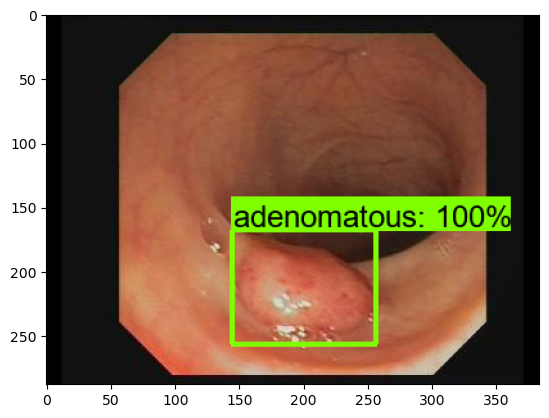

Running inference for 112.jpg... Done


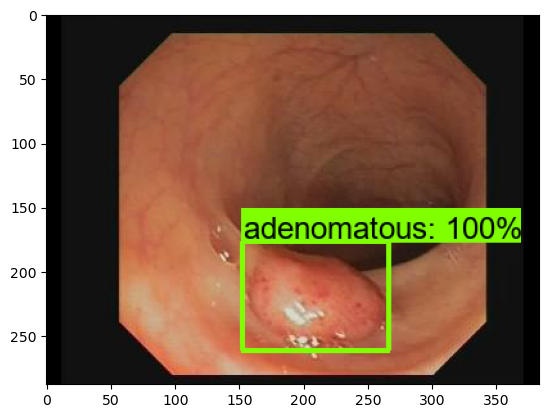

Running inference for 113.jpg... Done


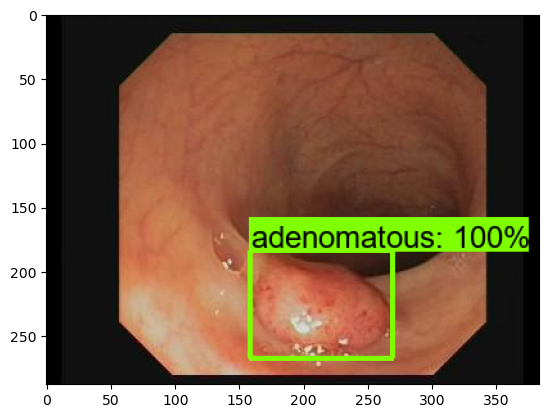

Running inference for 114.jpg... Done


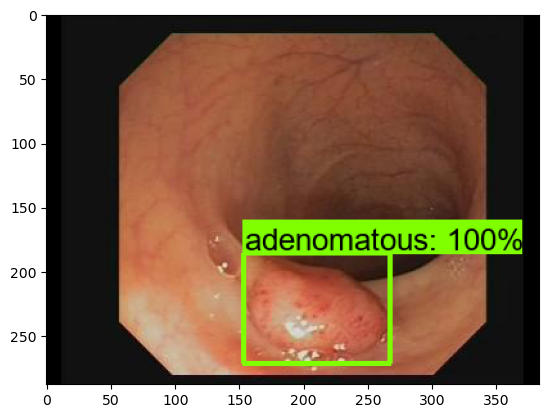

Running inference for 115.jpg... Done


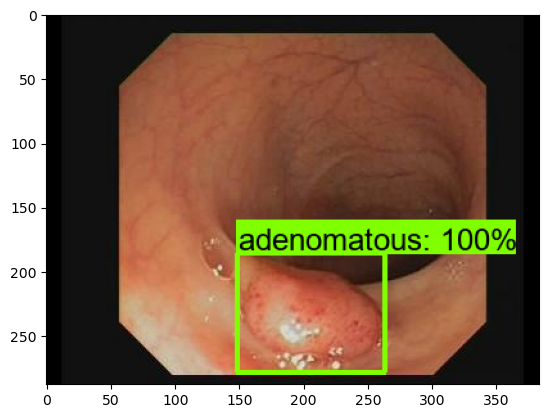

Running inference for 116.jpg... Done


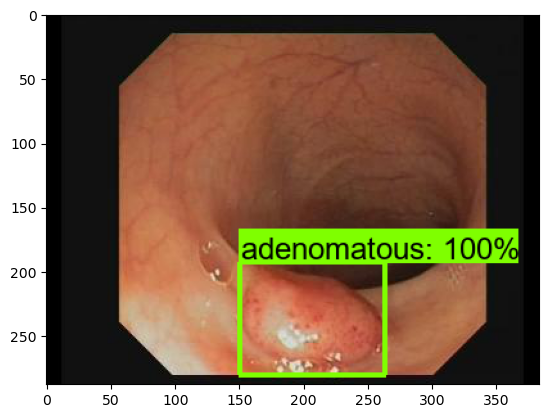

Running inference for 117.jpg... Done


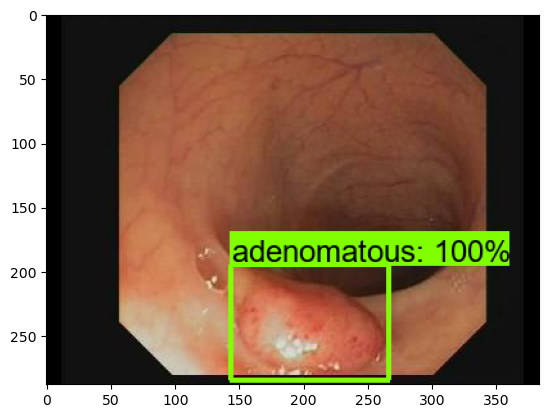

Running inference for 118.jpg... Done


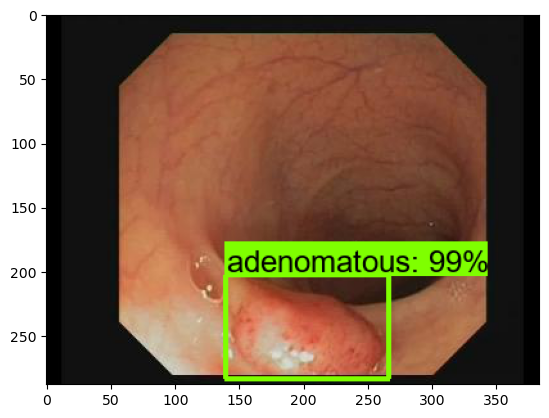

Running inference for 119.jpg... Done


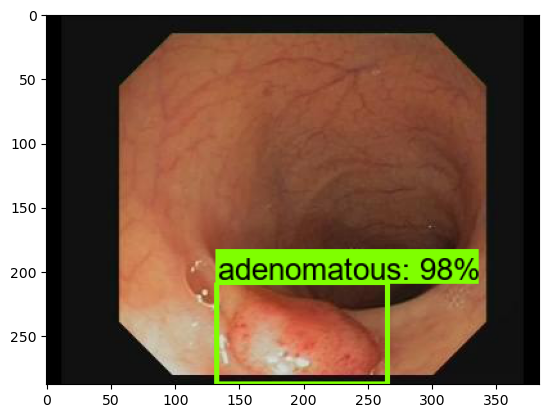

Running inference for 12.jpg... Done


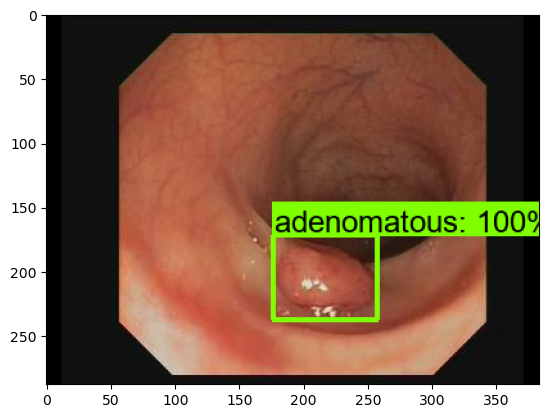

Running inference for 120.jpg... Done


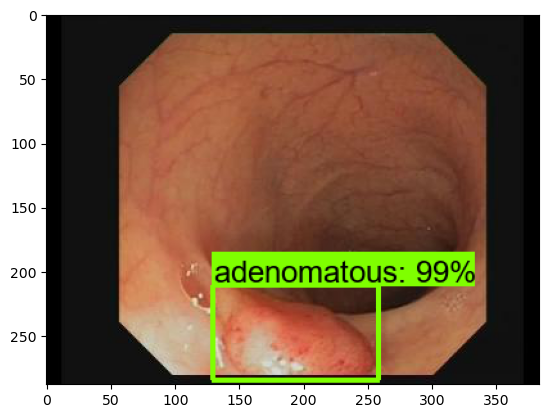

Running inference for 121.jpg... Done


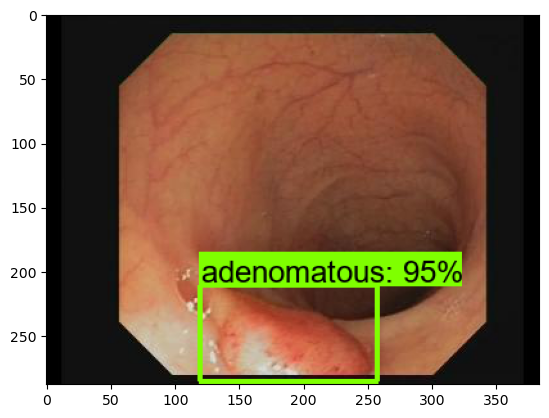

Running inference for 122.jpg... Done


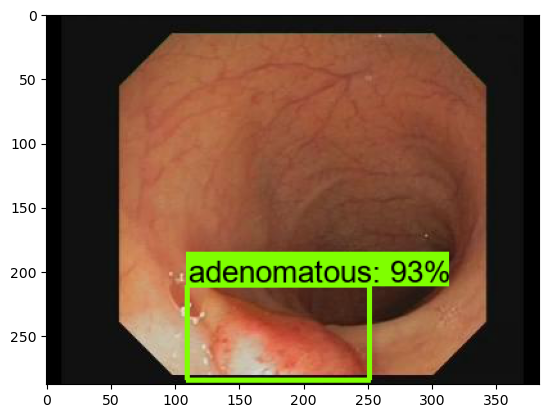

Running inference for 123.jpg... Done


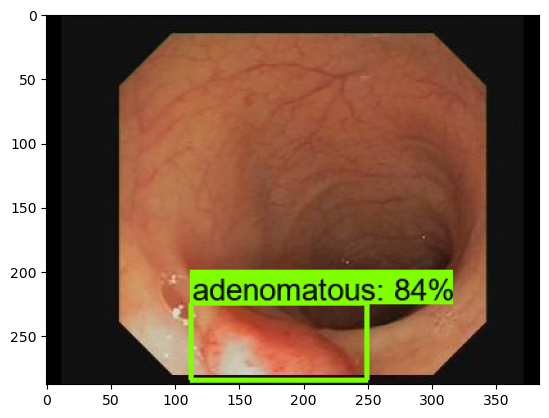

Running inference for 124.jpg... Done


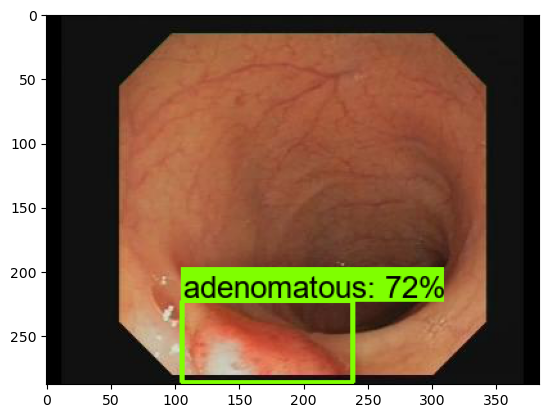

Running inference for 125.jpg... Done


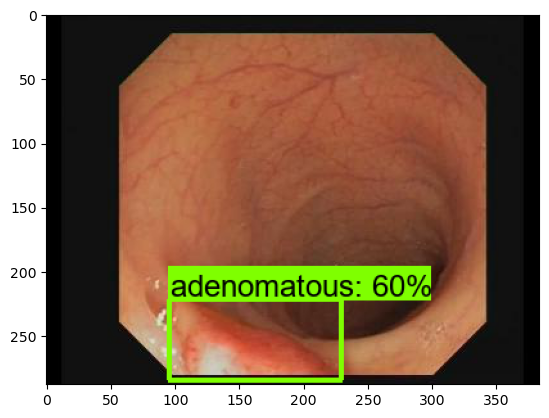

Running inference for 126.jpg... Done


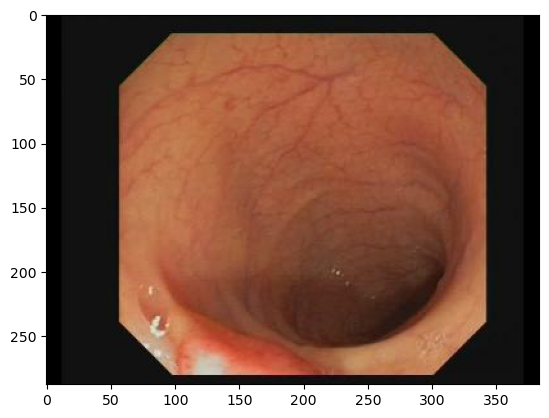

Running inference for 127.jpg... Done


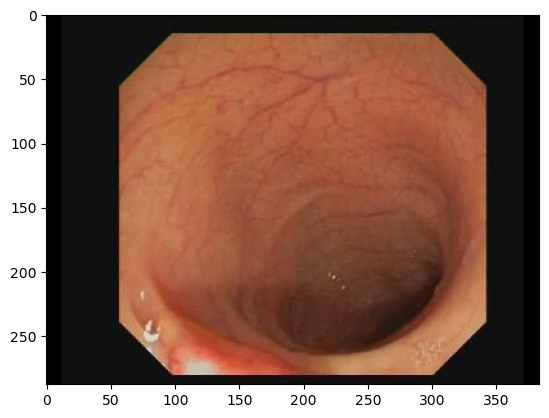

Running inference for 13.jpg... Done


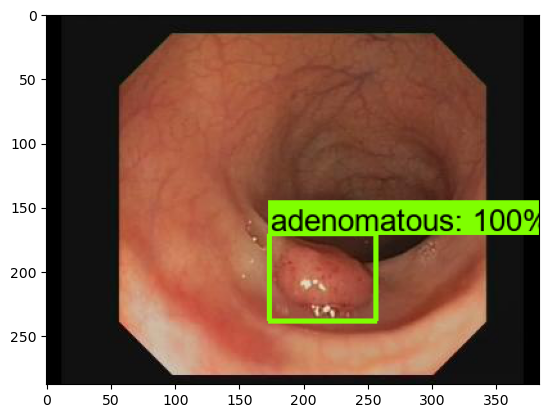

Running inference for 14.jpg... Done


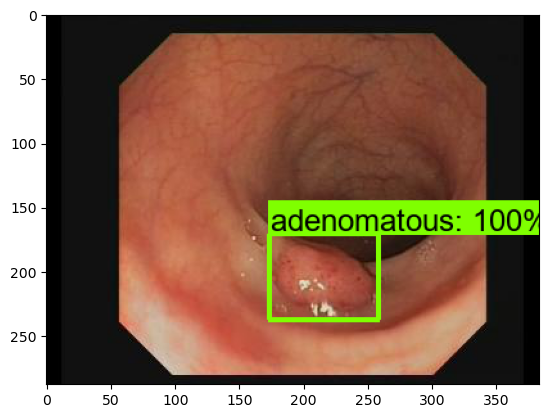

Running inference for 141.jpg... Done


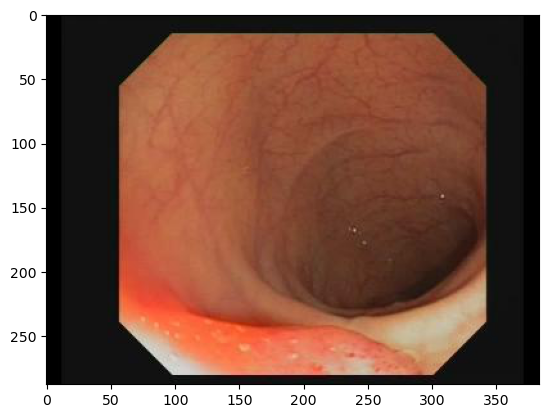

Running inference for 142.jpg... Done


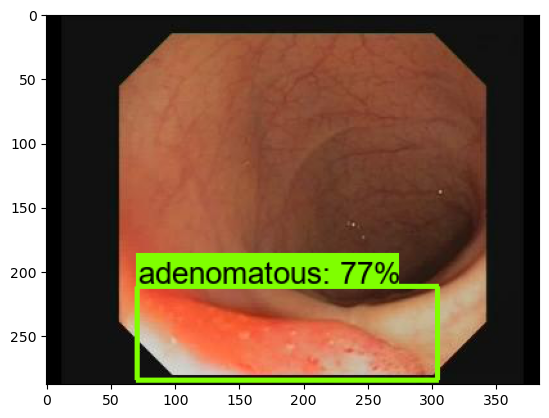

Running inference for 143.jpg... Done


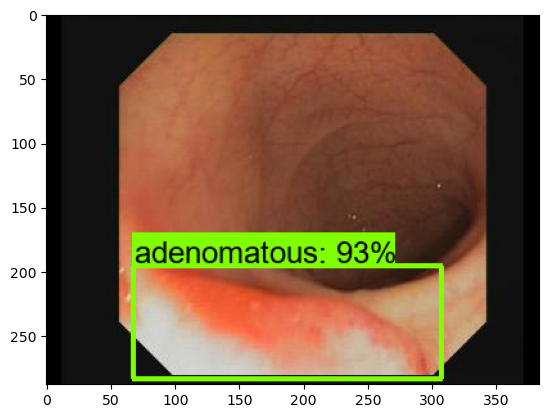

In [ ]:


def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

IMAGES_DIR = 'C:/Users/dell g3/Downloads/PolypsSet/test2019/ImageTest/Splitted/adenomatous/1'
IMAGE_FILENAMES = os.listdir(IMAGES_DIR)
for image_filename in IMAGE_FILENAMES:

    print('Running inference for {}... '.format(image_filename), end='')

    image_path = os.path.join(IMAGES_DIR, image_filename)
    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(
        np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'][0].numpy(),
          (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
          detections['detection_scores'][0].numpy(),
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=1,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()


from saved model to tflite

In [16]:
!pip install toco

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ------------------------------------- 132.7/132.7 kB 44.8 kB/s eta 0:00:00
     --------------------------------------- 10.4/10.4 MB 93.5 kB/s eta 0:00:00
     --------------------------------------- 79.6/79.6 kB 59.2 kB/s eta 0:00:00


In [5]:
os.chdir('C:/Users/dell g3/tmp1/models/workspace/training_demo')

In [6]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
export_path = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/exported-models/my_model/saved_model'
input0 = []
# We start a session using a temporary fresh Graph
with tf.compat.v1.Session(graph=tf.Graph()) as sess:
    '''
    You can provide 'tags' when saving a model,
    in my case I provided, 'serve' tag 
    '''

    tf.compat.v1.saved_model.loader.load(sess, ['serve'], export_path)
    graph = tf.compat.v1.get_default_graph()

    # print your graph's ops, if needed
    print(graph.get_operations())

    '''
    In my case, I named my input and output tensors as
    input:0 and output:0 respectively
    ''' 
    y_pred = sess.run('Identity_7', feed_dict={'input_tensor': input0})

INFO:tensorflow:Restoring parameters from C:/Users/dell g3/tmp1/models/workspace/training_demo/exported-models/my_model/saved_model\variables\variables


INFO:tensorflow:Restoring parameters from C:/Users/dell g3/tmp1/models/workspace/training_demo/exported-models/my_model/saved_model\variables\variables


[<tf.Operation 'Const' type=Const>, <tf.Operation 'Const_1' type=Const>, <tf.Operation 'Const_2' type=Const>, <tf.Operation 'conv5_block3_3_bn/moving_variance' type=VarHandleOp>, <tf.Operation 'conv5_block3_3_bn/moving_variance/Read/ReadVariableOp' type=ReadVariableOp>, <tf.Operation 'conv5_block3_3_bn/moving_mean' type=VarHandleOp>, <tf.Operation 'conv5_block3_3_bn/moving_mean/Read/ReadVariableOp' type=ReadVariableOp>, <tf.Operation 'conv5_block3_3_bn/beta' type=VarHandleOp>, <tf.Operation 'conv5_block3_3_bn/beta/Read/ReadVariableOp' type=ReadVariableOp>, <tf.Operation 'conv5_block3_3_bn/gamma' type=VarHandleOp>, <tf.Operation 'conv5_block3_3_bn/gamma/Read/ReadVariableOp' type=ReadVariableOp>, <tf.Operation 'conv5_block3_3_conv/kernel' type=VarHandleOp>, <tf.Operation 'conv5_block3_3_conv/kernel/Read/ReadVariableOp' type=ReadVariableOp>, <tf.Operation 'conv5_block3_2_bn/moving_variance' type=VarHandleOp>, <tf.Operation 'conv5_block3_2_bn/moving_variance/Read/ReadVariableOp' type=ReadV

TypeError: Cannot interpret feed_dict key as Tensor: The name 'input_tensor' looks like an (invalid) Operation name, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".

In [12]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

loaded = tf.saved_model.load('C:/Users/dell g3/tmp1/models/workspace/training_demo/exported-models/my_model/saved_model')
infer = loaded.signatures['serving_default']

f = tf.function(infer).get_concrete_function(input_tensor=tf.TensorSpec(shape=[None, 28, 28, 3], dtype=tf.uint8))
f2 = convert_variables_to_constants_v2(f)
graph_def = f2.graph.as_graph_def()

# Export frozen graph
with tf.io.gfile.GFile('frozen_graph2.pb', 'wb') as f:
    f.write(graph_def.SerializeToString())

In [13]:
def load_graph(frozen_graph_filename):
    with tf.io.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="prefix")
    return graph


if __name__ == '__main__':
    graph = load_graph('C:/Users/dell g3/frozen_graph2.pb')
    for op in graph.get_operations():
        abc = graph.get_tensor_by_name(op.name + ":0")
        print(abc)

Tensor("prefix/input_tensor:0", shape=(None, 28, 28, 3), dtype=uint8)
Tensor("prefix/88819:0", shape=(2,), dtype=float32)
Tensor("prefix/88823:0", shape=(2,), dtype=float32)
Tensor("prefix/88821:0", shape=(2,), dtype=float32)
Tensor("prefix/88385:0", shape=(7, 7, 3, 64), dtype=float32)
Tensor("prefix/88387:0", shape=(64,), dtype=float32)
Tensor("prefix/88389:0", shape=(64,), dtype=float32)
Tensor("prefix/88391:0", shape=(64,), dtype=float32)
Tensor("prefix/88393:0", shape=(64,), dtype=float32)
Tensor("prefix/88417:0", shape=(1, 1, 64, 256), dtype=float32)
Tensor("prefix/88419:0", shape=(256,), dtype=float32)
Tensor("prefix/88421:0", shape=(256,), dtype=float32)
Tensor("prefix/88423:0", shape=(256,), dtype=float32)
Tensor("prefix/88425:0", shape=(256,), dtype=float32)
Tensor("prefix/88395:0", shape=(1, 1, 64, 64), dtype=float32)
Tensor("prefix/88397:0", shape=(64,), dtype=float32)
Tensor("prefix/88399:0", shape=(64,), dtype=float32)
Tensor("prefix/88401:0", shape=(64,), dtype=float32)
T

KeyError: "The name 'prefix/Func/StatefulPartitionedCall/input_control_node/_0:0' refers to a Tensor which does not exist. The operation, 'prefix/Func/StatefulPartitionedCall/input_control_node/_0', exists but only has 0 outputs."

In [21]:

import tensorflow as tf
tf.__version__ # TF1.15.5

gf = tf.compat.v1.GraphDef()  
m_file = open('C:/Users/dell g3/frozen_graph2.pb','rb')
gf.ParseFromString(m_file.read())
 
with open('somefile.txt', 'a') as the_file:
    
    for n in gf.node:
        the_file.write(n.name+'\n')

file = open('somefile.txt','r')
data = file.readlines()
print("output name = ")
print(data[len(data)-1])
 
print("Input name = ")
file.seek ( 0 )
print(file.readline())

output name = 
Identity_7

Input name = 
input_tensor



In [18]:
"""
output name = 
Identity_7

Input name = 
input_tensor
"""

'\noutput name = \nIdentity_7\n\nInput name = \ninput_tensor\n'

In [20]:

path = "C:/Users/dell g3/tmp1/models/workspace/training_demo/exported-models/my_model/saved_model/frozen_graph.pb"

inputs = ["input_tensor"]
output = ["Identity_7"]
# Convert the model
converter = tf.compat.v1.lite.TFLiteConverter.from_frozen_graph(path, input_arrays=inputs, output_arrays=output)
converter.allow_custom_ops = True
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
print("starting conversion")

tflite_model = converter.convert()

print("done converting")

# Save the model.
with open('/content/drive/MyDrive/model.tflite', 'wb') as f:
    f.write(tflite_model)

starting conversion


TypeError: EndVector() missing 1 required positional argument: 'vectorNumElems'

In [42]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [36]:
from tensorflow.python.tools import freeze_graph


In [33]:
W=tf.Variable(initial_value=tf.random.normal([1]), name='weight',trainable=True)
b=tf.Variable(initial_value=0.001,name='bias',trainable=True)

tf.compat.v1.disable_eager_execution()
x=tf.compat.v1.placeholder(dtype=tf.float32, shape=[1],name='x')
y=tf.add(tf.multiply(W,x),b,name='output')
init=tf.global_variables_initializer()
saver=tf.train.Saver()
save_path="C:/Users/dell g3/tmp1/models/workspace/training_demo/faster_rcnn_resnet50_v1_640x640_/"
model_save=save_path+"model.ckpt"
#TensorFlow session
with tf.Session() as sess:
    sess.run(init) #initialising the variables
    op=sess.run(y, feed_dict={x: np.reshape(1.5,[1])}) #sample run(optional)
    saver.save(sess,model_save) #saving the model
    tf.train.write_graph(sess.graph_def, save_path, 'savegraph.pbtxt') #saving the model's tensorflow graph definition


In [34]:
save_path="C:/Users/dell g3/tmp1/models/workspace/training_demo/faster_rcnn_resnet50_v1_640x640_/" #directory to model files
MODEL_NAME = 'Sample_model' #name of the model optional
input_graph_path = save_path+'savegraph.pbtxt'#complete path to the input graph
checkpoint_path = save_path+'model.ckpt' #complete path to the model's checkpoint file
input_saver_def_path = ""
input_binary = False
output_node_names = "output" #output node's name. Should match to that mentioned in your code
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = save_path+'frozen_model_'+MODEL_NAME+'.pb' # the name of .pb file you would like to give
clear_devices = True


In [37]:
freeze_graph.freeze_graph(input_graph_path, input_saver_def_path,
                          input_binary, checkpoint_path, output_node_names,
                          restore_op_name, filename_tensor_name,
                          output_frozen_graph_name, clear_devices, "")

Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from C:/Users/dell g3/tmp1/models/workspace/training_demo/faster_rcnn_resnet50_v1_640x640_/model.ckpt


INFO:tensorflow:Restoring parameters from C:/Users/dell g3/tmp1/models/workspace/training_demo/faster_rcnn_resnet50_v1_640x640_/model.ckpt


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


node {
  name: "weight"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 1
          }
        }
        float_val: -0.8448818922042847
      }
    }
  }
}
node {
  name: "weight/read"
  op: "Identity"
  input: "weight"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@weight"
      }
    }
  }
}
node {
  name: "bias"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0010000000474974513
      }
    }
  }
}
node {
  name: "bias/read"
  op: "Identity"
  input: "bias"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "_class"
    value {
      list

In [46]:
graph_def_file = 'C:/Users/dell g3/tmp1/models/workspace/training_demo/faster_rcnn_resnet50_v1_640x640_/frozen_model_Sample_model.pb'
input_arrays = ['Mul_1', 'bias/read']
output_arrays = ['output']

In [47]:
converter = tf.lite.TocoConverter.from_frozen_graph(graph_def_file, input_arrays, output_arrays)


In [48]:
tflite = converter.convert()
open("faster_rcnn.tflite", "wb").write(tflite)

TypeError: EndVector() missing 1 required positional argument: 'vectorNumElems'

In [11]:
os.chdir('C:/Users/dell g3/Downloads/PolypsSet/yolo/yolov5')

In [2]:
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests

In [3]:
TRAIN = True
# Number of epochs to train for.
EPOCHS = 1500

In [5]:
class_names = ['hyperplastic', 'adenomatous']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

# Verifying that the bounding boxes transformed to yolo fits the image

In [6]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        ) 

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        # Text width and height
        tw, th = cv2.getTextSize(
            class_name, 
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image, 
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [7]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()
    
    num_images = len(all_training_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

In [8]:
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

In [9]:
def monitor_tensorboard():
    %load_ext tensorboard
    %tensorboard --logdir runs/train

In [12]:
monitor_tensorboard()

In [16]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 293.3/293.3 kB 1.1 MB/s eta 0:00:00


In [23]:
with tf.device(device_name=device):

    RES_DIR = set_res_dir()

    if TRAIN:
        !python train.py --data ./data.yaml --weights yolov5l.pt \
        --img 640 --epochs {EPOCHS} --batch-size 4 --name {RES_DIR}

Current number of result directories: 1
results_2
^C


### Creating trian.txt and val.txt for yolo

In [25]:
os.chdir('C:/Users/dell g3/Downloads/PolypsSet/yolo/data/images')

In [29]:
x = os.listdir("C:/Users/dell g3/Downloads/PolypsSet/yolo/data/images/train")

In [30]:
l = []
for i in x:
    y = 'data/{}'.format(i)
    l.append(y)


In [31]:

with open(r'C:/Users/dell g3/Downloads/PolypsSet/yolo/data/generated_txt_files/train.txt', 'w') as fp:
    for item in l:
        fp.write("%s\n" % item)
    print('Done')

Done


In [6]:
os.chdir('C:/Users/dell g3/tmp1/models/workspace/training_demo/exported-models/my_model_faster_rcnn')

In [8]:
New_Model = tf.keras.models.load_model('saved_model')

ValueError: Unable to create a Keras model from SavedModel at saved_model. This SavedModel was exported with `tf.saved_model.save`, and lacks the Keras metadata file. Please save your Keras model by calling `model.save` or `tf.keras.models.save_model`. Note that you can still load this SavedModel with `tf.saved_model.load`.

In [11]:
from tensorflow import keras


In [12]:
New_Model = keras.models.load_model('saved_model')

ValueError: Unable to create a Keras model from SavedModel at saved_model. This SavedModel was exported with `tf.saved_model.save`, and lacks the Keras metadata file. Please save your Keras model by calling `model.save` or `tf.keras.models.save_model`. Note that you can still load this SavedModel with `tf.saved_model.load`.

In [10]:
keras.models.save_model(New_Model, 'new_save_model.h5')

AttributeError: '_UserObject' object has no attribute 'outputs'

In [16]:
# load model
model = tf.saved_model.load("saved_model")

print(list(model.signatures.keys()))  # ["serving_default"]
print("#####")
infer = model.signatures["serving_default"]
print(infer.structured_outputs) #{'output_0': TensorSpec(shape=(1, 2), dtype=tf.float32, name='output_0')}



['serving_default']
#####3
{'detection_boxes': TensorSpec(shape=(1, 300, 4), dtype=tf.float32, name='detection_boxes'), 'detection_scores': TensorSpec(shape=(1, 300), dtype=tf.float32, name='detection_scores'), 'num_detections': TensorSpec(shape=(1,), dtype=tf.float32, name='num_detections'), 'detection_multiclass_scores': TensorSpec(shape=(1, 300, 3), dtype=tf.float32, name='detection_multiclass_scores'), 'raw_detection_boxes': TensorSpec(shape=(1, 300, 4), dtype=tf.float32, name='raw_detection_boxes'), 'detection_classes': TensorSpec(shape=(1, 300), dtype=tf.float32, name='detection_classes'), 'raw_detection_scores': TensorSpec(shape=(1, 300, 3), dtype=tf.float32, name='raw_detection_scores'), 'detection_anchor_indices': TensorSpec(shape=(1, 300), dtype=tf.float32, name='detection_anchor_indices')}


In [2]:
os.chdir('C:/Users/dell g3/Downloads/PolypsSet/yolo/yolov8')
#  C:/Users/dell g3/Downloads/PolypsSet/yolo/yolov8/data.yaml